#**Asymptotic Analysis - Recursive [Profling and Benchmarking]**

#**Installations and Imports**

In [ ]:
import time

import random

import math

import numpy as np

import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

#**Helper Functions**

In [ ]:
def generate_random_numbers(n, low, high, seed=12345, sort=False):
    """
    Generate a list of n random integer numbers within a given range.

    Parameters:
    n (int): The number of random numbers to generate.
    low (int): The lower limit of the range.
    high (int): The upper limit of the range.
    seed (int, optional): The seed for the random number generator.
    sort (bool, optional): Whether to sort the numbers.

    Returns:
    numpy.ndarray: A numpy array of random numbers.
    """

    generator = np.random.default_rng(seed)

    # Generate n random integers in the range [low, high)
    random_numbers = generator.integers(low, high, size=n)

    if sort:
        random_numbers = np.sort(random_numbers)

    return random_numbers

In [ ]:
def visualize_distribution(random_numbers, bins = 'auto', figsize=(12, 6)):
    """
    Function to visualize the distribution of a list of numbers through a line chart and a histogram.

    Parameters:
    random_numbers (list or numpy array): The input list of numbers.
    bins: Optional argument to set bin size. Default is auto.
    figsize (tuple): Optional argument to set the size of the figure. Default is (12, 6).

    Returns:
    None
    """
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Line plot
    axes[0].plot(np.arange(len(random_numbers)), random_numbers, label = 'distribution')
    axes[0].set_xlabel('Index')
    axes[0].set_ylabel('Value')

    # Histogram
    axes[1].hist(random_numbers, bins = bins, label = 'histogram')
    axes[1].set_xlabel('Bin')
    axes[1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

In [ ]:
def time_profiler(function_to_profile, inputs, repetitions=20):
    """
    Profile the execution time of a function.

    Parameters:
    function_to_profile (function): The function to profile.
    inputs (list): The inputs to the function.
    repetitions (int): The number of times to call the function.

    Returns:
    results_list: A list containing the result of each function call.
    times_list: A list containing the time taken for each function call.
    """
    # Initialize the lists that will hold the results and times
    results_list = []
    times_list = []

    # Call the function the specified number of times
    for _ in range(repetitions):
        # Record the start time
        starting_time = time.time()

        # Call the function and capture its output
        result = function_to_profile(inputs)

        # Calculate the elapsed time
        elapsed_time = time.time() - starting_time

        # Add the result and time to the lists
        results_list.append(result)
        times_list.append(elapsed_time)

    return np.array(results_list), np.array(times_list)


In [ ]:
def step_profiler(function_to_profile, inputs, repetitions=20):
    """
    Profile the number of steps taken by a function.

    Parameters:
    function_to_profile (function): The function to profile.
    inputs (list): The inputs to the function.
    repetitions (int): The number of times to call the function.

    Returns:
    results_list: A list containing the result of each function call.
    steps_list: A list containing the number of steps taken for each function call.
    """
    # Initialize the lists that will hold the results and steps
    results_list = []
    steps_list = []

    # Call the function the specified number of times
    for _ in range(repetitions):
        # Call the function and capture its output and number of steps
        result, steps = function_to_profile(inputs)

        # Add the result and number of steps to the lists
        results_list.append(result)
        steps_list.append(steps)

    return np.array(results_list), np.array(steps_list)

In [ ]:
def plot_execution_measurements(execution_measurements, ylabel, title, normalize=False, figsize=(10, 6)):

    fig, ax = plt.subplots(figsize=figsize)

    if normalize:
        # If normalize is True, divide the result by its maximum value
        y_values = execution_measurements / np.max(execution_measurements)
    else:
        y_values = execution_measurements

    # Use the index in the list as the x value (execution serial)
    ax.plot(range(len(execution_measurements)), y_values, linewidth=2)

    ax.set_xlabel('Execution Serial', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14)

    # ax.grid(True)  # This makes the plot easier to read

    # # Customizing the spines of the plot to make it more appealing
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_comparison(time_logs, step_logs, x_label, y_label, title, figsize=(10, 6)):
    """
    Plot a comparison between time measurements and step measurements.

    Parameters:
    time_logs (list): List containing time measurements.
    step_logs (list): List containing step measurements.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    title (str): The title of the plot.
    figsize (tuple, optional): Tuple defining the size of the figure.

    Returns:
    None
    """

    fig, ax = plt.subplots(figsize=figsize)

    # Normalize the logs by their maximum values
    normalized_time_log = time_logs / np.max(time_logs)

    normalized_step_log = step_logs / np.max(step_logs)

   # Plot the normalized logs
    ax.plot(range(len(time_logs)), normalized_time_log, label='Elapsed time', color='b')
    ax.plot(range(len(step_logs)), normalized_step_log, label='Number of steps', color='g')

    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.set_title(title, fontsize=14)

    # Add grid and legend
    ax.grid(True)
    ax.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_all_comparison(time_log_dict, step_log_dict, x_label, y_label, title, figsize=(8, 8)):
    """
    Plot multiple comparisons of elapsed time and number of steps in the same graph.

    Parameters:
    time_log_dict (dict): A dictionary with labels as keys and time logs as values.
    step_log_dict (dict): A dictionary with labels as keys and step logs as values.
    x_label (str): Label for the x-axis.
    y_label (str): Label for the y-axis.
    title (str): Title of the graph.
    figsize (tuple): Size of the figure (default is (8, 8)).

    Returns:
    None.
    """
    plt.figure(figsize=figsize)

    # Normalize and plot each log in the time_log_dict
    for label, data in time_log_dict.items():
        normalized_data = [datum / max(data) for datum in data]
        plt.plot(normalized_data, label=f'Time - {label}')

    # Normalize and plot each log in the step_log_dict
    for label, data in step_log_dict.items():
        normalized_data = [datum / max(data) for datum in data]
        plt.plot(normalized_data, label=f'Step - {label}')

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

In [ ]:
def multiple_execution_log(function_without_steps, function_with_steps, start, end, size_gap, repetitions=1):
    """
    Profile the execution time and number of steps of a function for different input sizes.

    Parameters:
    function_to_profile (function): The function to profile for execution time.
    function_with_steps (function): The function to profile for number of steps.
    start (int): The starting input size.
    end (int): The ending input size.
    size_gap (int): The gap between input sizes.
    repetitions (int, optional): The number of times to call the function for each input size.

    Returns:
    time_logs (list): List of average execution times for each input size.
    step_logs (list): List of average numbers of steps for each input size.
    """
    # Initialize lists to store time logs and step logs
    time_logs = []
    step_logs = []

    # Loop over each input size from start to end with the defined size gap
    for size in range(start, end + 1, size_gap):
        # Generate random numbers
        numbers = generate_random_numbers(n=size, low=2, high=100, sort=False)

        # Time profile the function and append the average elapsed time to the time_logs list
        _, time_log = time_profiler(function_without_steps, numbers, repetitions=repetitions)
        time_logs.append(np.mean(time_log))

        # Step profile the function and append the average number of steps to the step_logs list
        _, step_log = step_profiler(function_with_steps, numbers, repetitions=repetitions)
        step_logs.append(np.mean(step_log))

    return time_logs, step_logs

#**Generating Random Numbers**

In [ ]:
# Generating Random Integers

n = 100

low = 2

high = 100

random_numbers = generate_random_numbers(n = n, low = low, high = high, sort = False)

print(random_numbers)

[70 24 79 33 22 80 64 68 98 40 84 34 57 60 22 20 24 67 62 94 71 26 91 94
 73 67 14 11 28 45  9 88 48 70 22 33 13 73 77 23 72  9 40 17 74 35 48 47
 48 28 56 81 50 20  4 14  9 10 14 60 81 85 66 60 34 93 64 73 73 86 70 93
 55 55 26 93 56 50 33 28 64 46 57 67 90 34 68 90 46 27 30 35 63 27 84 36
  8  2  4 63]


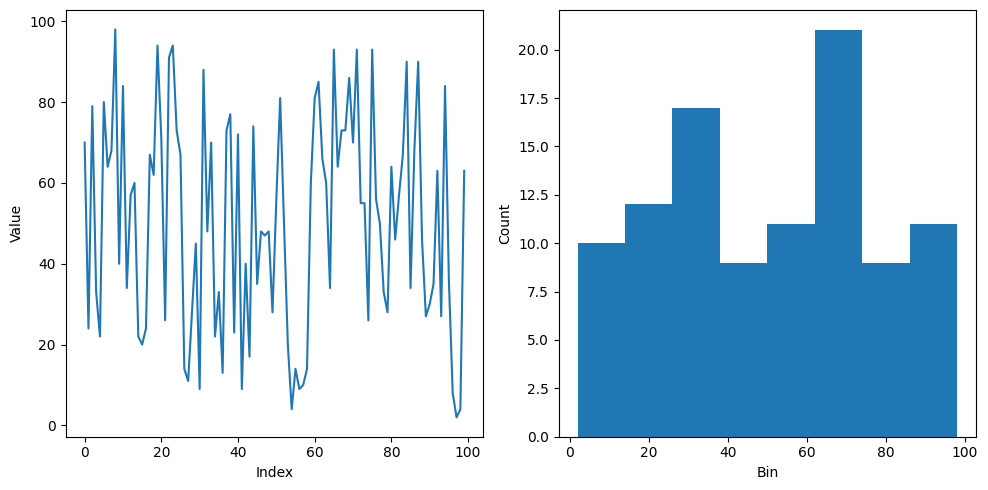

In [ ]:
visualize_distribution(random_numbers, figsize = (10, 5))

#**Machine Dependent [Time] vs Machine Independent [Step] Based Measurement**

#**Linear Complexity**

**Calculation of Sum without Steps**

In [ ]:
def calculate_sum_recursive(numbers):
    """
    Calculate the sum of a list of values using recursion.

    Parameters:
    values (list): List of numbers.

    Returns:
    summation (int/float): The sum of the list of values.
    """
    # Base case: if the list is empty, return 0
    if len(numbers) == 0:
        return 0
    # Recursive case: return the first value plus the sum of the rest of the list
    else:
        return numbers[0] + calculate_sum_recursive(numbers[1:])

**Calculation of Sum with Steps**

In [1]:
def calculate_sum_with_steps_recursive(numbers, steps_counter=0):
    """
    Calculate the sum of a list of numbers using recursion and count the number of steps taken to do so.

    Parameters:
    numbers (list): List of numbers.
    steps_counter (int): The number of steps taken to calculate the sum.

    Returns:
    summation (int/float): The sum of the list of numbers.
    steps_counter (int): The number of steps taken to calculate the sum.
    """
    # Base case: if the list is empty, return 0 and steps_counter
    if len(numbers) == 0:
        return 0, steps_counter

    # Recursive case: return the first number plus the sum of the rest of the list, and increment steps_counter
    else:
        # Count the step of accessing the number
        steps_counter += 1

        summation, steps_counter = calculate_sum_with_steps_recursive(numbers[1:], steps_counter)

        # Count the step of adding the number to the summation
        steps_counter += 1

        return numbers[0] + summation, steps_counter

In [ ]:
def calculate_sum_with_steps_recursive_helper(numbers):

  return calculate_sum_with_steps_recursive(numbers, steps_counter=0)

**Profiling Time for a Single Function Call [Sum without Steps]**

In [ ]:
results, time_log = time_profiler(calculate_sum_recursive, random_numbers, repetitions = 1)

print('Summation: {0}'.format(results[0]))

print('Elapsed Time: {0}'.format(time_log[0]))

Summation: 5029
Elapsed Time: 0.00017642974853515625


**Profiling Time for Repeated Number of Function Calls [Sum without Steps]**

In [ ]:
results, time_log = time_profiler(calculate_sum_recursive, random_numbers, repetitions = 20)

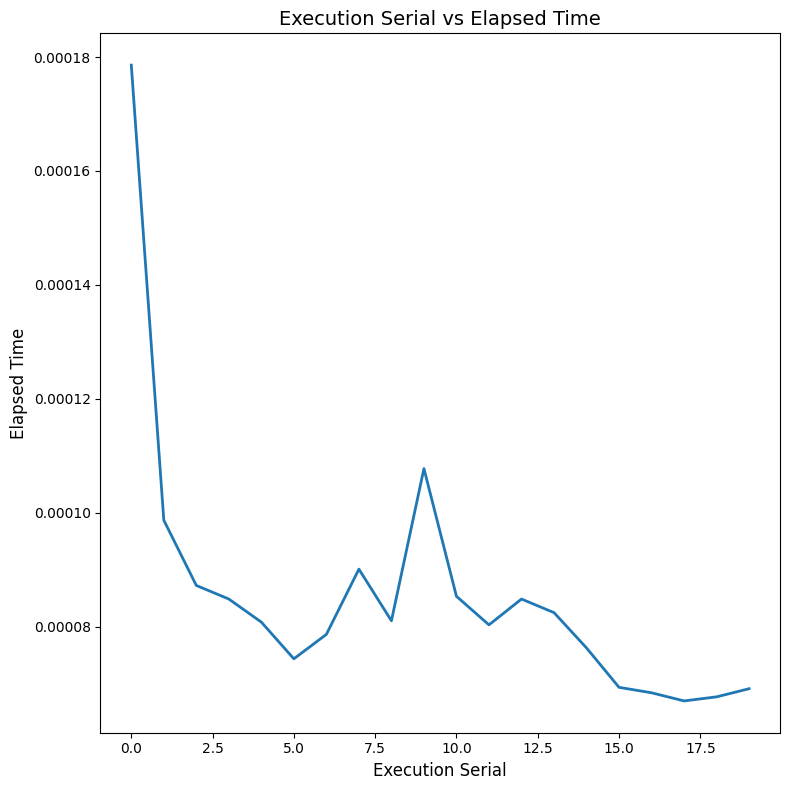

In [ ]:
plot_execution_measurements(time_log, 'Elapsed Time', 'Execution Serial vs Elapsed Time', normalize=False, figsize=(8, 8))

**Profiling Steps for a Single Function Call [Sum with Steps]**

In [ ]:
results, step_log = step_profiler(calculate_sum_with_steps_recursive_helper, random_numbers, repetitions=1)

print('Summation: {0}'.format(results[0]))

print('Steps Counter: {0}'.format(step_log[0]))

Summation: 5029
Steps Counter: 200


**Profiling Steps for Repeated Number of Function Calls [Sum with Steps]**

In [ ]:
results, step_log = step_profiler(calculate_sum_with_steps_recursive_helper, random_numbers, repetitions=20)

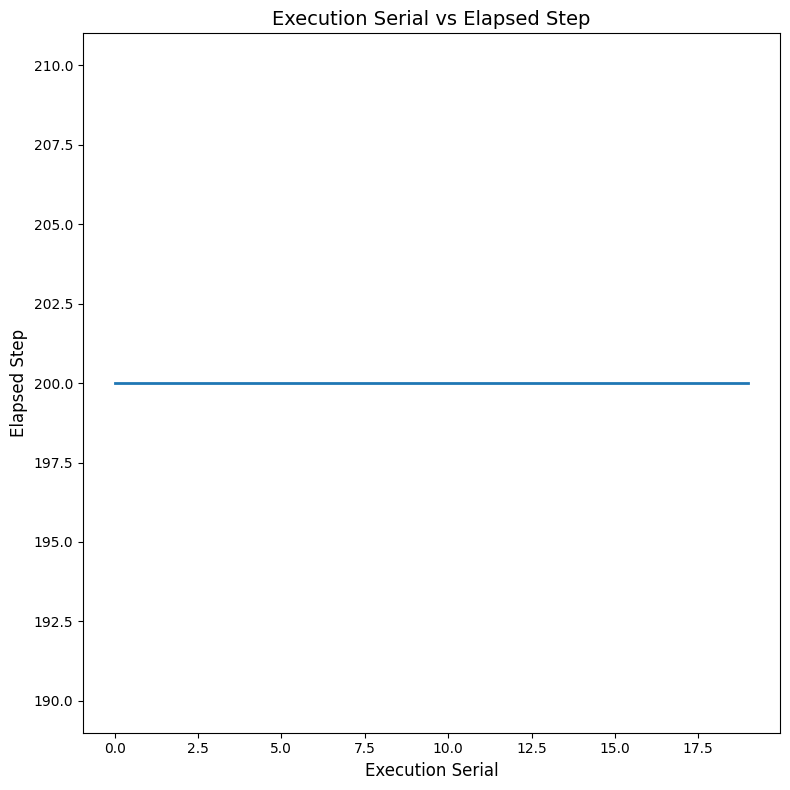

In [ ]:
plot_execution_measurements(step_log, 'Elapsed Step', 'Execution Serial vs Elapsed Step', normalize=False, figsize=(8, 8))

**Comparison Between Time and Step Based Measurement [Normalized]**

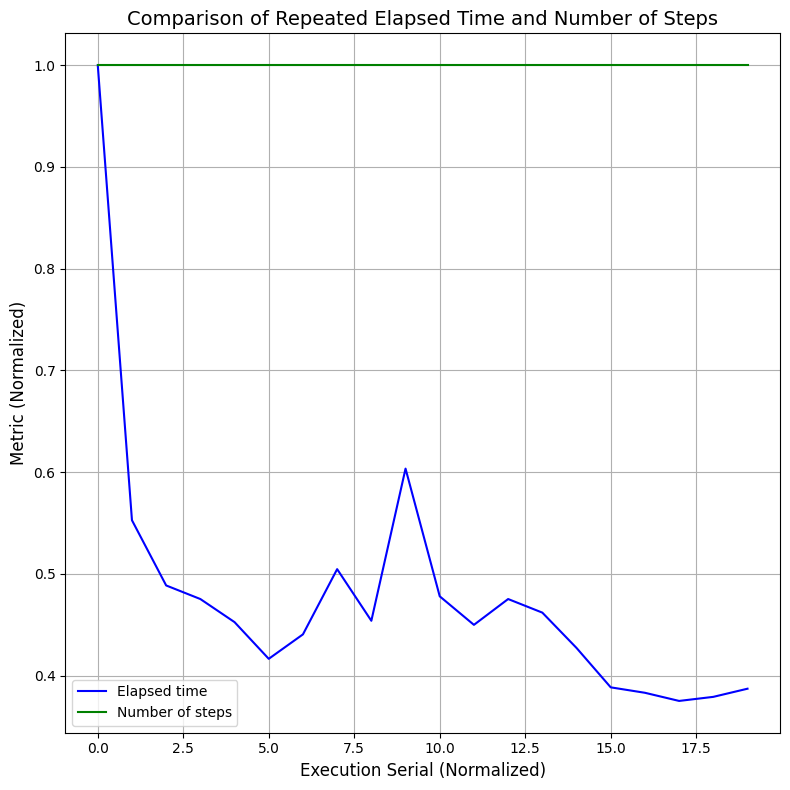

In [ ]:
plot_comparison(time_log, step_log, 'Execution Serial (Normalized)', 'Metric (Normalized)', 'Comparison of Repeated Elapsed Time and Number of Steps', figsize=(8, 8))

**Now Let's Compare for Variable Input Sizes**

In [ ]:
# Check using larger Ranges. For e.g. changing 500 to 50000

linear_time_logs, linear_step_logs = multiple_execution_log(calculate_sum_recursive, calculate_sum_with_steps_recursive_helper, 1, 500, 50, repetitions = 1)

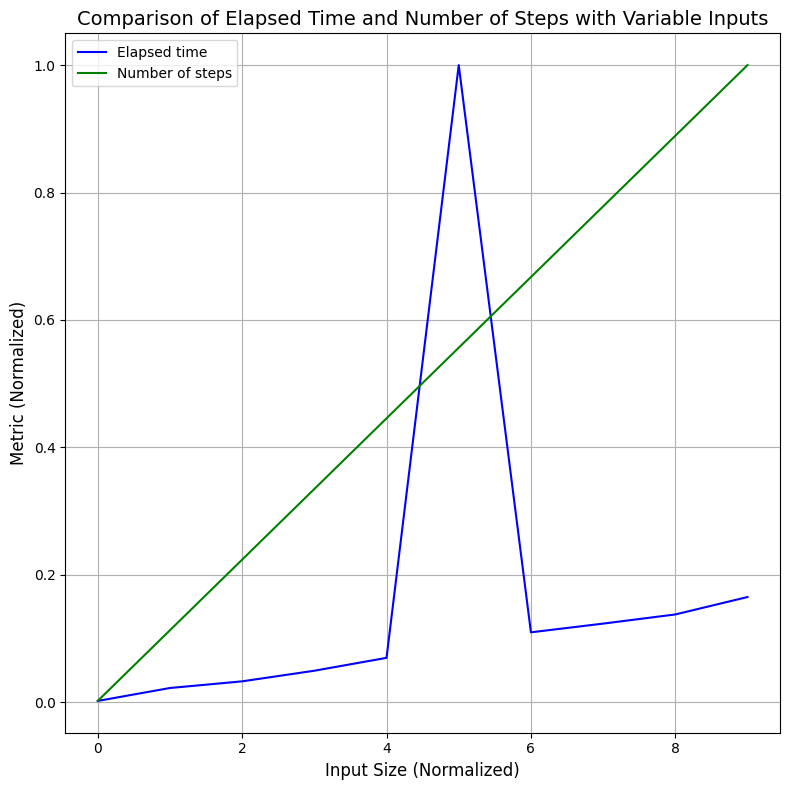

In [ ]:
plot_comparison(linear_time_logs, linear_step_logs, 'Input Size (Normalized)', 'Metric (Normalized)', 'Comparison of Elapsed Time and Number of Steps with Variable Inputs', figsize=(8, 8))

#**Quadratic Complexity**

**Sorting without Steps**

In [ ]:
def selection_sort_recursive(values, start_index=0):
    """
    Sort an array using the selection sort algorithm in a recursive manner.

    Parameters:
    values (list or numpy.ndarray): The array to sort.
    start_index (int): Starting index of the unsorted portion of the array.

    Returns:
    values (list or numpy.ndarray): The sorted array.
    """
    # Base case: if we have traversed the whole array
    if start_index == len(values):
        return values

    # Find the minimum element in remaining unsorted array
    min_index = start_index + np.argmin(values[start_index:])

    # Swap the found minimum element with the first element of the unsorted part
    values[start_index], values[min_index] = values[min_index], values[start_index]

    # Recursive case: sort the remaining unsorted part of the array
    return selection_sort_recursive(values, start_index + 1)

In [ ]:
def selection_sort_recursive_helper(values):
    """
    Helper function for selection_sort_recursive to start recursion from index 0.

    Parameters:
    values (list): The list to be sorted.

    Returns:
    sorted_list (list): The sorted list.
    """
    return selection_sort_recursive(values, start_index=0)

**Sorting with Steps**

In [ ]:
def get_min_index_recursive(values, current_index, steps_counter=0):
    """
    Recursive function to find the index of the minimum value in the list.

    Parameters:
    values (list): The list to search.
    current_index (int): Current index of the search.
    steps_counter (int): The number of steps taken so far.

    Returns:
    min_index (int): Index of the minimum value.
    steps_counter (int): The total number of steps after the operation.
    """
    if current_index == len(values) - 1:
        steps_counter += 1
        return current_index, steps_counter

    min_index, steps_counter = get_min_index_recursive(values, current_index + 1, steps_counter)
    steps_counter += 1

    if values[current_index] < values[min_index]:
        steps_counter += 1
        min_index = current_index
        steps_counter += 1

    steps_counter += 1

    return min_index, steps_counter


def selection_sort_with_steps_recursive(values, start_index=0, steps_counter=0):
    """
    Sort a list using the selection sort algorithm in a recursive manner and count the number of steps.

    Parameters:
    values (list): The list to sort.
    start_index (int): Starting index of the unsorted portion of the list.
    steps_counter (int): The number of steps taken so far.

    Returns:
    values (list): The sorted list.
    steps_counter (int): The total number of steps after the operation.
    """
    if start_index == len(values):
        steps_counter += 1
        return values, steps_counter

    min_index, steps_counter = get_min_index_recursive(values, start_index, steps_counter)
    steps_counter += 1

    # Swap the found minimum element with the first element of the unsorted part
    values[start_index], values[min_index] = values[min_index], values[start_index]
    steps_counter += 1

    # Recursive case: sort the remaining unsorted part of the array
    return selection_sort_with_steps_recursive(values, start_index + 1, steps_counter)


In [ ]:
def selection_sort_with_steps_recursive_helper(values):
    """
    Helper function for selection_sort_with_steps_recursive to start recursion from index 0 and steps_counter 0.

    Parameters:
    values (list): The list to be sorted.

    Returns:
    sorted_list (list): The sorted list.
    steps_counter (int): The number of steps taken to sort the list.
    """
    return selection_sort_with_steps_recursive(values, start_index=0, steps_counter=0)

**Profiling Time for a Single Function Call [Sum without Steps]**

In [ ]:
results, time_log = time_profiler(selection_sort_recursive_helper, random_numbers, repetitions = 1)

print('Sorted: {0}'.format(results))

print('Elapsed Time: {0}'.format(time_log[0]))

Sorted: [[ 2  4  4  8  9  9  9 10 11 13 14 14 14 17 20 20 22 22 22 23 24 24 26 26
  27 27 28 28 28 30 33 33 33 34 34 34 35 35 36 40 40 45 46 46 47 48 48 48
  50 50 55 55 56 56 57 57 60 60 60 62 63 63 64 64 64 66 67 67 67 68 68 70
  70 70 71 72 73 73 73 73 74 77 79 80 81 81 84 84 85 86 88 90 90 91 93 93
  93 94 94 98]]
Elapsed Time: 0.0008664131164550781


**Profiling Time for Repeated Number of Function Calls [Sum without Steps]**

In [ ]:
results, time_log = time_profiler(selection_sort_recursive_helper, random_numbers, repetitions = 20)

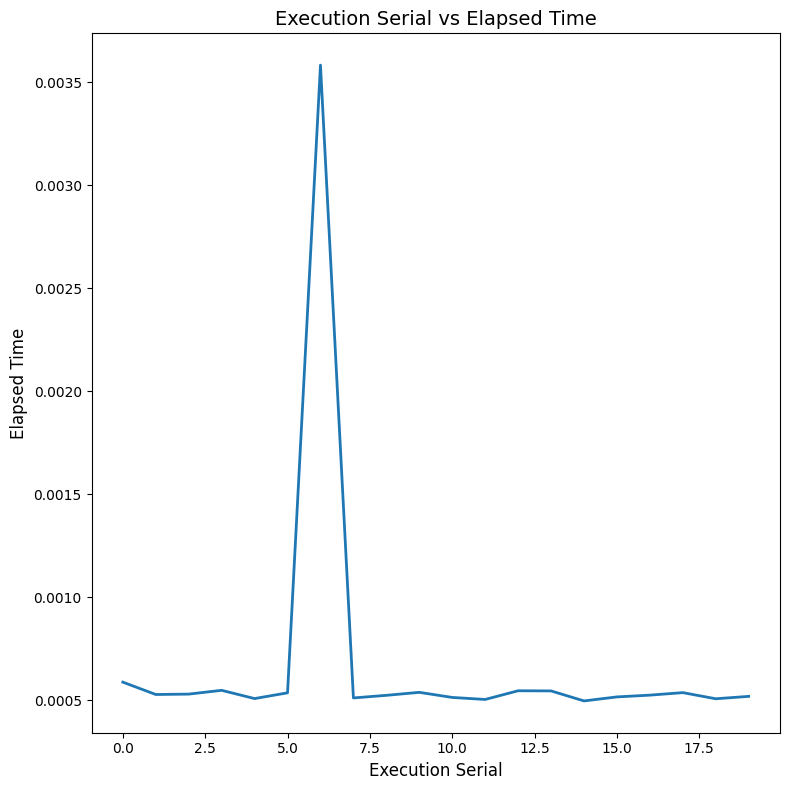

In [ ]:
plot_execution_measurements(time_log, 'Elapsed Time', 'Execution Serial vs Elapsed Time', normalize=False, figsize=(8, 8))

**Profiling Steps for a Single Function Call [Sum with Steps]**

In [ ]:
results, step_log = step_profiler(selection_sort_with_steps_recursive_helper, random_numbers, repetitions=1)

print('Sorted: {0}'.format(results))

print('Steps Counter: {0}'.format(step_log))

Sorted: [[ 2  4  4  8  9  9  9 10 11 13 14 14 14 17 20 20 22 22 22 23 24 24 26 26
  27 27 28 28 28 30 33 33 33 34 34 34 35 35 36 40 40 45 46 46 47 48 48 48
  50 50 55 55 56 56 57 57 60 60 60 62 63 63 64 64 64 66 67 67 67 68 68 70
  70 70 71 72 73 73 73 73 74 77 79 80 81 81 84 84 85 86 88 90 90 91 93 93
  93 94 94 98]]
Steps Counter: [10200]


**Profiling Steps for Repeated Number of Function Calls [Sum with Steps]**

In [ ]:
results, step_log = step_profiler(selection_sort_with_steps_recursive_helper, random_numbers, repetitions=20)

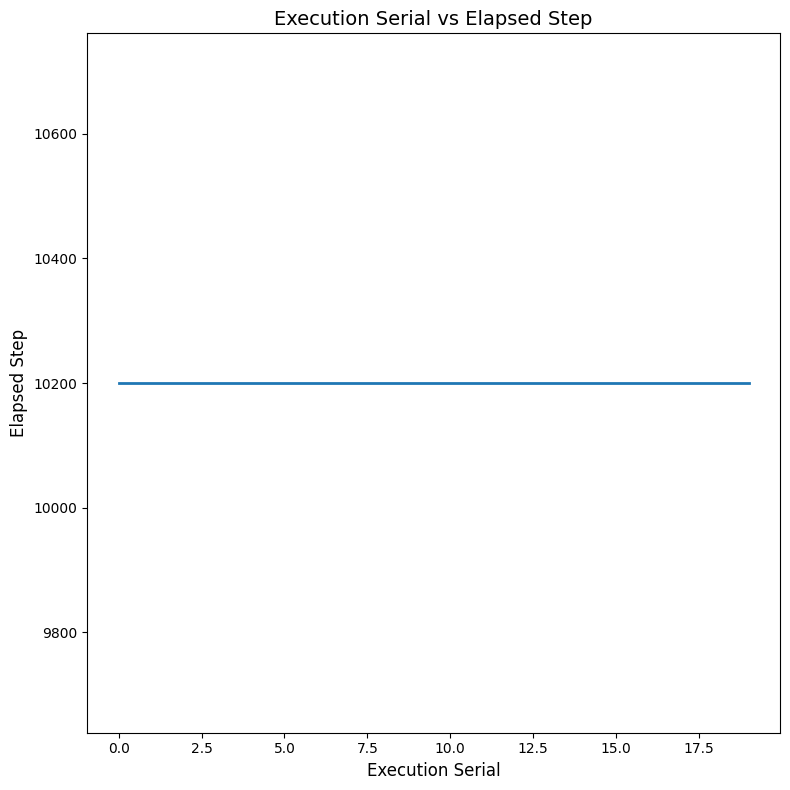

In [ ]:
plot_execution_measurements(step_log, 'Elapsed Step', 'Execution Serial vs Elapsed Step', normalize=False, figsize=(8, 8))

**Comparison Between Time and Step Based Measurement [Normalized]**

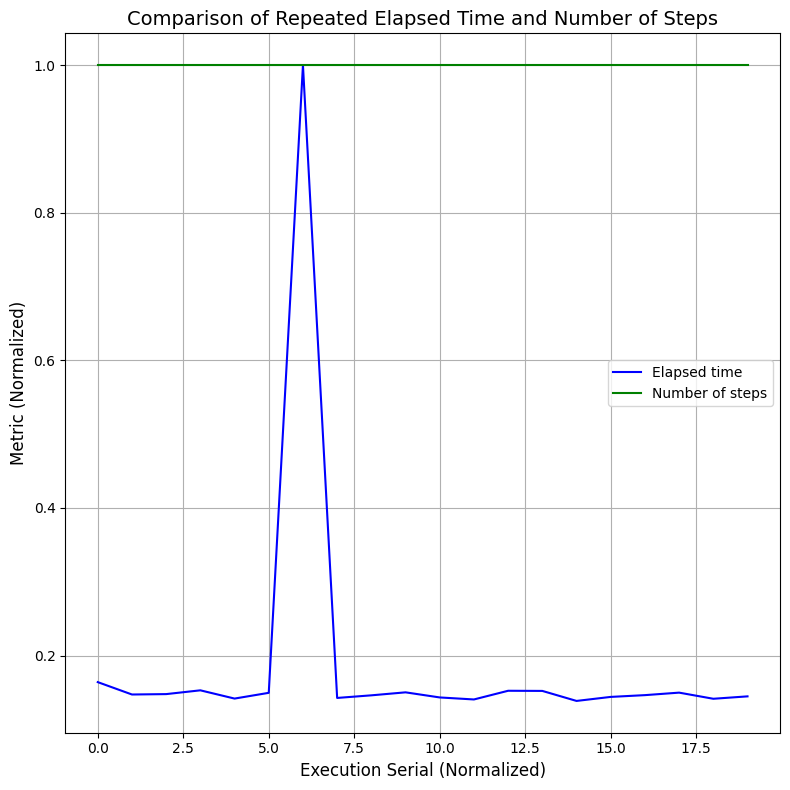

In [ ]:
plot_comparison(time_log, step_log, 'Execution Serial (Normalized)', 'Metric (Normalized)', 'Comparison of Repeated Elapsed Time and Number of Steps', figsize=(8, 8))

**Now Let's Compare for Variable Input Sizes**

In [ ]:
# Check with larger Ranges. For e.g. changing 800 to 3000

quadratic_time_logs, quadratic_step_logs = multiple_execution_log(selection_sort_recursive_helper, selection_sort_with_steps_recursive_helper, 1, 800, 30, repetitions = 1)

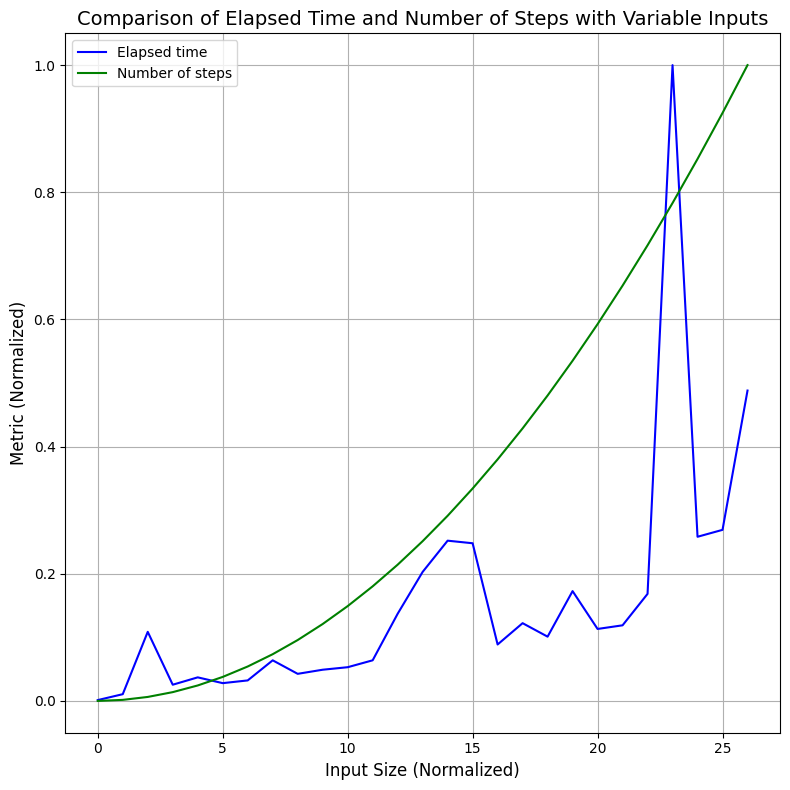

In [ ]:
plot_comparison(quadratic_time_logs, quadratic_step_logs, 'Input Size (Normalized)', 'Metric (Normalized)', 'Comparison of Elapsed Time and Number of Steps with Variable Inputs', figsize=(8, 8))

#**Comprised Comparison**

In [ ]:
time_log_dict = {'Elapsed Time Log [Linear]': linear_time_logs,
                 'Elapsed Time Log [Quadratic]': quadratic_time_logs}

step_log_dict = {'Number of Steps Log [Linear]': linear_step_logs,
                 'Number of Steps Log [Quadratic]': quadratic_step_logs}

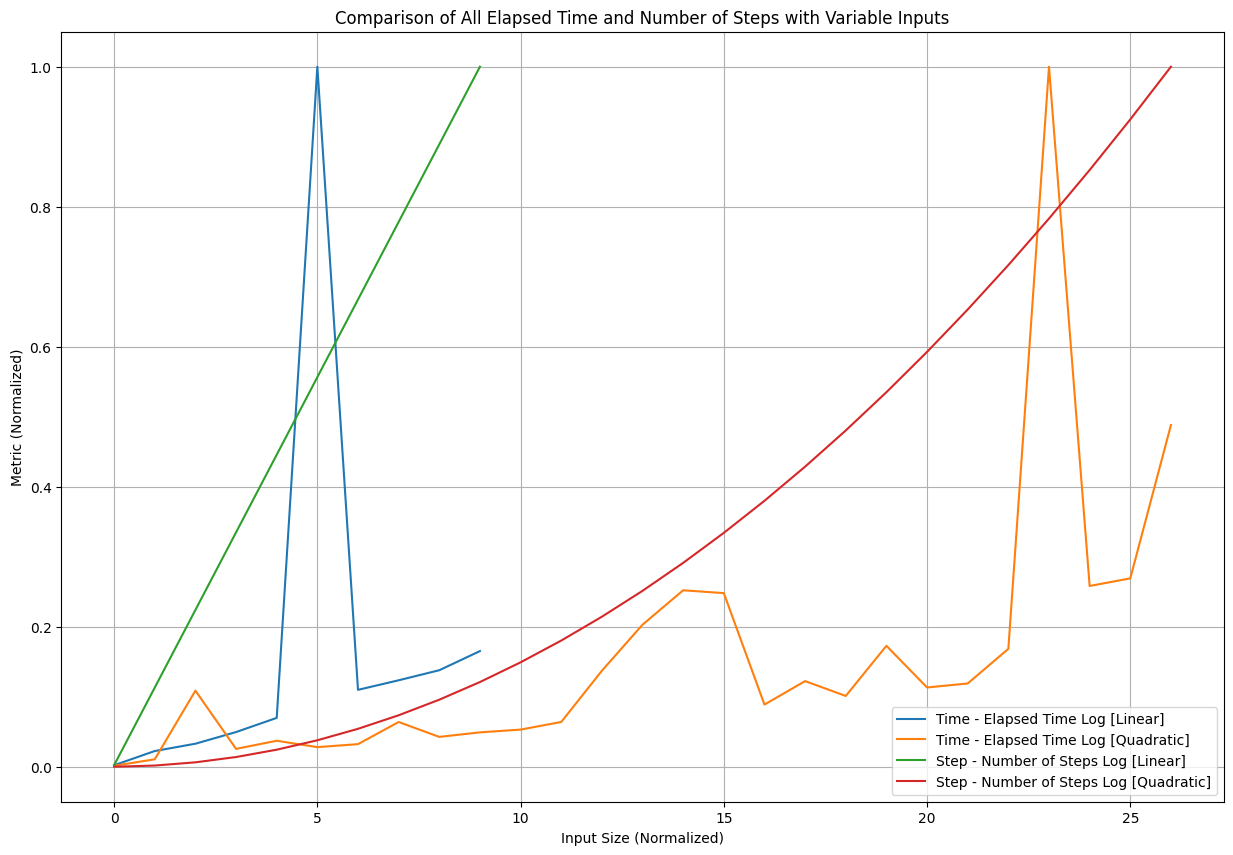

In [ ]:
plot_all_comparison(time_log_dict, step_log_dict, 'Input Size (Normalized)', 'Metric (Normalized)', 'Comparison of All Elapsed Time and Number of Steps with Variable Inputs', figsize=(15, 10))

#[More](https://github.com/lse-my470/lectures/blob/master/wk9/MY470_wk9_lecture.ipynb)